# Analyzing Covid-19 Data in Andorra

## data source

The data is from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

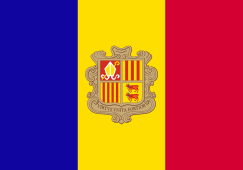

In [2]:
%matplotlib inline
import pandas

# Import Data from S3 Bucket

In [5]:
df=pandas.read_excel('s3://ia241-lee/covid_data.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## List of Unique Countries

In [6]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## Andorra Data

In [8]:
Andorra_data= df.loc[df['countriesAndTerritories']=='Andorra']
Andorra_data[:10] #for simplication purposes, I am using the top ten data.

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
966,14/12/2020,14,12,2020,50,1,Andorra,AD,AND,76177.0,Europe,821.770351
967,13/12/2020,13,12,2020,52,0,Andorra,AD,AND,76177.0,Europe,811.268493
968,2020-12-12 00:00:00,12,12,2020,46,0,Andorra,AD,AND,76177.0,Europe,821.770351
969,2020-11-12 00:00:00,11,12,2020,28,0,Andorra,AD,AND,76177.0,Europe,861.152316
970,2020-10-12 00:00:00,10,12,2020,35,0,Andorra,AD,AND,76177.0,Europe,963.545427
971,2020-09-12 00:00:00,9,12,2020,43,0,Andorra,AD,AND,76177.0,Europe,1018.680179
972,2020-08-12 00:00:00,8,12,2020,34,0,Andorra,AD,AND,76177.0,Europe,1023.931108
973,2020-07-12 00:00:00,7,12,2020,45,0,Andorra,AD,AND,76177.0,Europe,1042.309358
974,2020-06-12 00:00:00,6,12,2020,50,1,Andorra,AD,AND,76177.0,Europe,1047.560287
975,2020-05-12 00:00:00,5,12,2020,51,0,Andorra,AD,AND,76177.0,Europe,1067.251270


# What are the trends of Covid-19 cases in Andorra over time?

<AxesSubplot:xlabel='month'>

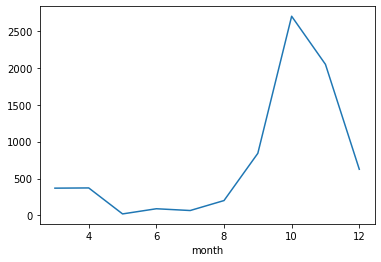

In [28]:
covid_cases_over_time = Andorra_data.groupby('month').sum()['cases']
covid_cases_over_time.plot() #Plotting number of cases over time using a line graph

Based on the graph, there seems to not be a consistent trend. The cases reached their peak in October and started to drop since then. In April, cases started to drop, however, in August, cases began to make a straight increase. It is important to not that the graphs in this project all begin in the third month, March, because that is when the data started getting collected.

## What are the months with the highest cases in Andorra?

<AxesSubplot:xlabel='month'>

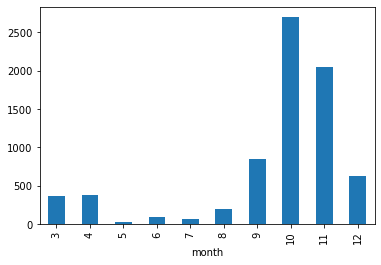

In [29]:
sum_cases_by_month= Andorra_data.groupby('month').sum()['cases']
sum_cases_by_month.plot.bar() #Displaying months with highest number of cases in a bar graph

Based on the graph, October had the most cases, followed by November. May, June, and July had the lowest amount of cases. 

## How many covid related deaths are there in Andorra?

<AxesSubplot:xlabel='dateRep'>

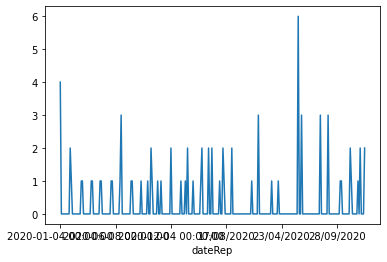

In [31]:
Andorra_deaths=Andorra_data.groupby('dateRep').sum()['deaths']
Andorra_deaths.plot() #Displaying covid related deaths on a line graph

From March to April, there was a steady increase and a peak in covid related deaths. From April, it started to drop and remained low until a steady rise in September. There was then a drop in October.

## Conclusion

To conclude, Andorra had its peak in Covid cases in October and November of 2020. Surprisingly, there was an inverse relationship between Covid cases and deaths. Though there was a peak of cases in October and November, the highest peak for covid related deaths was in April with its next peak in October. April was one of the lowest moments of Covid cases. My limitations to this project was my lack of prior knowledge of programming before this class. Though I was equipped to complete this project, I was limited to finding out certain information because of my skill level. Another limitation is the data that is given. The data is only limited to 10 months in the year 2020. It would be beneficial to have updated information regarding Covid-19 spanning over more time.